# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
bt_data = requests.get(btc_url).json()
btc_price = bt_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35068.80
The current value of your 5.3 ETH is $10488.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [8]:
# Format current date as ISO format
start = pd.Timestamp("2023-04-13", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-04-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start,
    end=end
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Preview DataFrame
df_ticker.head()

AGG                                    \
                             open      high     low  close   volume   
timestamp                                                             
2023-04-13 04:00:00+00:00  100.16  100.2677  99.805  99.89  3964799   

                                                     SPY                    \
                          trade_count       vwap    open    high       low   
timestamp                                                                    
2023-04-13 04:00:00+00:00       18405  99.967812  409.18  413.84  407.9922   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2023-04-13 04:00:00+00:00  413.47  85814754      566796  411.717306

In [9]:
# Pick AGG and SPY close prices
df_ticker_closing=pd.DataFrame()

df_ticker_closing['AGG']=df_ticker['AGG']['close']
df_ticker_closing['SPY']=df_ticker['SPY']['close']

df_ticker_closing.index = df_ticker_closing.index.date
df_ticker_closing.reset_index(inplace=True)

df_ticker_clean = pd.DataFrame(df_ticker_closing)
df_ticker_clean.drop(['index'], axis=1) 

agg_close_price = df_ticker_clean['AGG'].astype('float')
spy_close_price = df_ticker_clean['SPY'].astype('float')

# Print AGG and SPY close prices
print(f"Current AGG closing price: $ {agg_close_price[0]}")
print(f"Current SPY closing price: $ {spy_close_price[0]}")

Current AGG closing price: $ 99.89
Current SPY closing price: $ 413.47


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${round(my_spy_value[0],2)}")
print(f"The current value of your {my_agg} AGG shares is ${round(my_agg_value[0],2)}")

The current value of your 50 SPY shares is $20673.5
The current value of your 200 AGG shares is $19978.0


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
share_assets = my_spy_value[0] + my_agg_value[0]

value_data = [crypto_assets, share_assets]

# Display DataFrame data
value_data

# Create savings DataFrame
df_savings = pd.DataFrame(value_data, columns=["amount"], index=['crypto','shares'])

# Display savings DataFrame
df_savings

,amount
crypto,45557.606
shares,40651.500


array([<AxesSubplot:ylabel='amount'>], dtype=object)

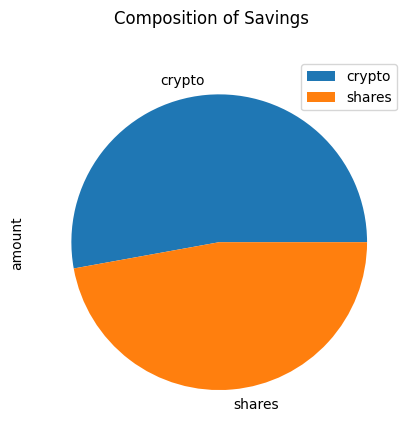

In [12]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True, title='Composition of Savings', y='amount')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_assets + share_assets

print(f"Monthly Income is: {monthly_income}")
print(f"Ideal Emergency Fund minimum is: {emergency_fund}")
print(f"Total Savings is: {round(total_savings,)}")

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")


Monthly Income is: 12000
Ideal Emergency Fund minimum is: 36000
Total Savings is: 86209
Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-04-13', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-04-13', tz='America/New_York').isoformat()


In [15]:
# Get 5 years' worth of historical data for SPY and AGG
ticker=("AGG","SPY")
timeframe = "1Day"

df_tickers = alpaca.get_bars(ticker, timeframe, start=start_date, end=end_date).df
df_tickers

# Reorganize the DataFrame
# Separate ticker data
AGG = df_tickers[df_tickers['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_tickers[df_tickers['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_mc_tickers = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_mc_tickers

AGG                                       \
                             open      high      low   close    volume   
timestamp                                                                
2018-04-13 04:00:00+00:00  106.69  106.8400  106.670  106.80   2764839   
2018-04-16 04:00:00+00:00  106.64  106.8400  106.610  106.82   3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.750  106.85   2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.540  106.55   2231676   
2018-04-19 04:00:00+00:00  106.34  106.3899  106.240  106.29  10985057   
...                           ...       ...      ...     ...       ...   
2023-04-06 04:00:00+00:00  100.56  100.6850  100.440  100.44   6105185   
2023-04-10 04:00:00+00:00   99.89   99.9100   99.600   99.75   4477958   
2023-04-11 04:00:00+00:00   99.81   99.8800   99.590   99.81   4543803   
2023-04-12 04:00:00+00:00  100.17  100.2000   99.610   99.93   7226122   
2023-04-13 04:00:00+00:00  100.16  100.2677   99.805   99.89   3964799   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-04-13 04:00:00+00:00       11536  106.786953  267.41  267.54  264.0100   
2018-04-16 04:00:00+00:00       13789  106.777580  267.00  268.20  266.0700   
2018-04-17 04:00:00+00:00        9268  106.843189  269.33  270.87  268.7500   
2018-04-18 04:00:00+00:00        9647  106.639143  270.69  271.30  269.8700   
2018-04-19 04:00:00+00:00       20047  106.302239  269.65  269.88  267.7200   
...                               ...         ...     ...     ...       ...   
2023-04-06 04:00:00+00:00       23351  100.515057  406.77  409.48  405.6780   
2023-04-10 04:00:00+00:00       21431   99.752952  406.61  409.69  405.9700   
2023-04-11 04:00:00+00:00       19479   99.740336  410.26  411.18  408.9200   
2023-04-12 04:00:00+00:00       33545   99.885733  411.87  412.17  407.4400   
2023-04-13 04:00:00+00:00       18405   99.967812  409.18  413.84  407.9922   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-04-13 04:00:00+00:00  265.11  86127234      311313  265.541433  
2018-04-16 04:00:00+00:00  267.37  63625287      251422  267.298482  
2018-04-17 04:00:00+00:00  270.13  64886136      253683  269.795896  
2018-04-18 04:00:00+00:00  270.37  58608057      197540  270.674441  
2018-04-19 04:00:00+00:00  268.87  77712909      284593  268.787580  
...                           ...       ...         ...         ...  
2023-04-06 04:00:00+00:00  409.19  63743345      482110  408.101856  
2023-04-10 04:00:00+00:00  409.61  63693219      468483  408.081412  
2023-04-11 04:00:00+00:00  409.72  59316777      403316  410.018650  
2023-04-12 04:00:00+00:00  408.05  86440377      639926  409.706051  
2023-04-13 04:00:00+00:00  413.47  85814754      566796  411.717306  

[1259 rows x 14 columns]

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers
for ticker in tickers:
    df_closing_prices[ticker] = df_mc_tickers[ticker]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices


,AGG,SPY
2018-04-13,106.80,265.11
2018-04-16,106.82,267.37
2018-04-17,106.85,270.13
2018-04-18,106.55,270.37
2018-04-19,106.29,268.87
...,...,...
2023-04-06,100.44,409.19
2023-04-10,99.75,409.61
2023-04-11,99.81,409.72
2023-04-12,99.93,408.05


In [17]:
# Printing the simulation input data
df_daily_returns = df_closing_prices.pct_change().dropna()
df_daily_returns

,AGG,SPY
2018-04-16,0.000187,0.008525
2018-04-17,0.000281,0.010323
2018-04-18,-0.002808,0.000888
2018-04-19,-0.002440,-0.005548
2018-04-20,-0.002728,-0.008220
...,...,...
2023-04-06,-0.000895,0.003901
2023-04-10,-0.006870,0.001026
2023-04-11,0.000602,0.000269
2023-04-12,0.001202,-0.004076


In [18]:
df_daily_returns.describe()

,AGG,SPY
count,1258.000000,1258.000000
mean,-0.000047,0.000441
std,0.003532,0.013230
min,-0.038090,-0.107828
25%,-0.001594,-0.005202
50%,0.000088,0.000882
75%,0.001602,0.007306
max,0.023721,0.086761


<AxesSubplot:ylabel='Frequency'>

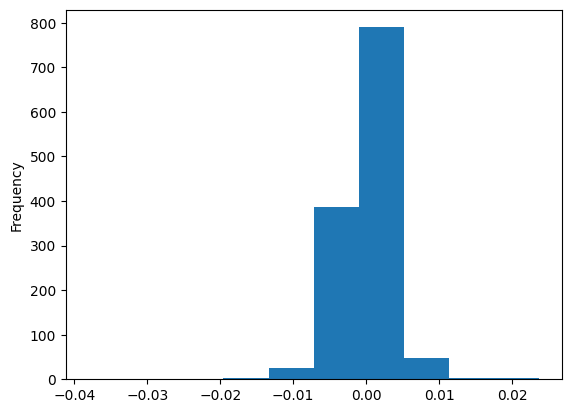

In [19]:
df_daily_returns['AGG'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

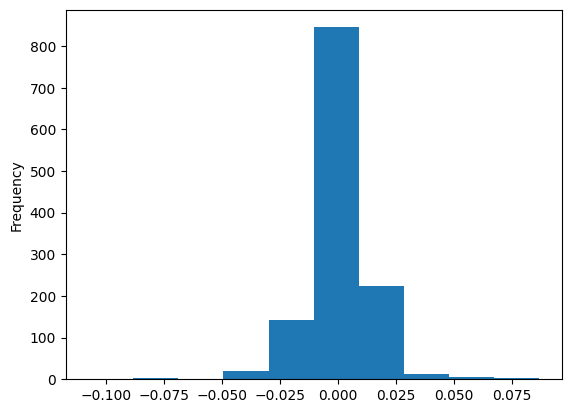

In [20]:
df_daily_returns['SPY'].plot.hist()

<AxesSubplot:ylabel='Density'>

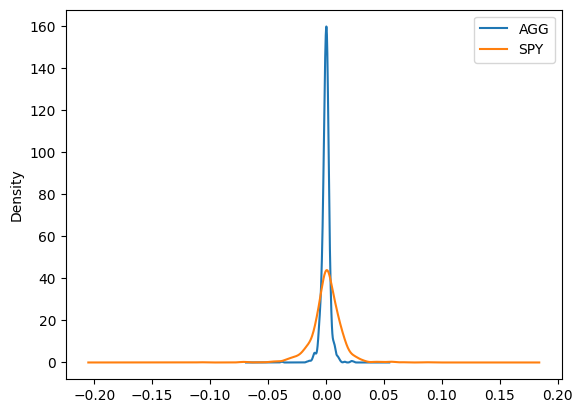

In [21]:
df_daily_returns.plot.density()

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
from MCForecastTools import MCSimulation

mc_thirty_years = MCSimulation(
    portfolio_data=df_mc_tickers,
    weights= [0.4,0.6],
    num_simulation=500,
    num_trading_days = 252*30   
)

mc_thirty_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hirenpatel/fintech/api/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998656,1.000567,0.997231,1.008070,1.003904,0.999654,0.991573,1.007833,0.993282,1.009002,...,1.004278,0.998722,0.999462,1.003524,1.001601,1.004774,1.009731,0.999418,0.998105,0.996369
2,0.993360,1.001678,1.003555,0.996315,1.010693,1.003512,0.979013,1.003579,0.998375,1.008609,...,1.006403,0.997069,0.992845,1.002948,0.994988,0.996855,1.000679,1.000028,0.979766,0.980789
3,1.004341,1.012278,0.999072,1.008332,1.016740,0.994123,0.976759,0.996207,1.004046,1.002680,...,1.002019,0.991753,0.982016,0.997409,0.992994,0.995974,1.000457,1.013765,0.973264,0.980405
4,1.017147,1.035615,1.007648,1.010161,1.010923,0.994576,0.981035,0.995844,1.007533,1.010329,...,1.004844,0.988662,0.989169,1.001366,0.990015,0.989882,1.002267,1.020717,0.969704,0.978698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.093465,4.012328,6.363281,5.905603,2.418262,2.447468,4.607784,16.724075,7.246422,16.577378,...,2.049582,2.604815,18.885164,2.431854,7.530988,11.079747,5.604981,0.554839,3.322944,4.667134
7557,2.088595,4.014396,6.355149,5.828560,2.398237,2.445360,4.628475,16.795572,7.278694,16.557049,...,2.066049,2.623325,18.640622,2.413946,7.564076,11.140525,5.627671,0.551065,3.303561,4.711838
7558,2.062300,4.001697,6.366333,5.779876,2.406809,2.489196,4.691575,16.873764,7.283826,16.662201,...,2.007137,2.617600,18.572381,2.395761,7.480154,11.104862,5.678851,0.551793,3.280540,4.673115
7559,2.103325,4.001030,6.355813,5.701092,2.408452,2.499378,4.747665,16.844048,7.278820,16.446895,...,2.031362,2.624193,18.467397,2.396202,7.436801,11.148634,5.643899,0.552142,3.260522,4.595918


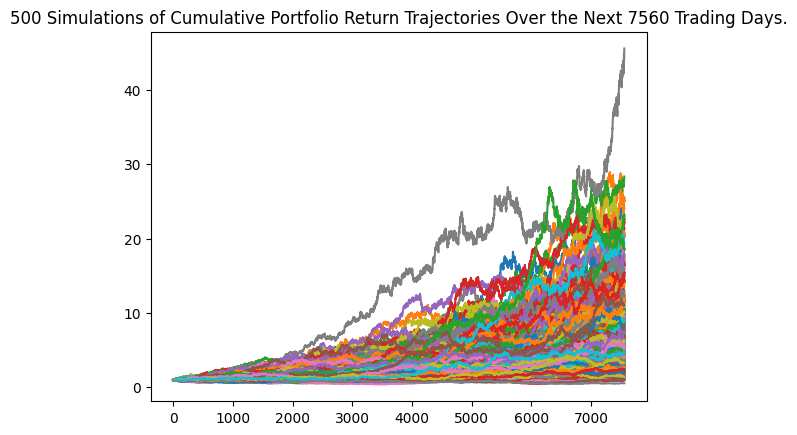

In [23]:
# Plot simulation outcomes
line_plot = mc_thirty_years.plot_simulation()

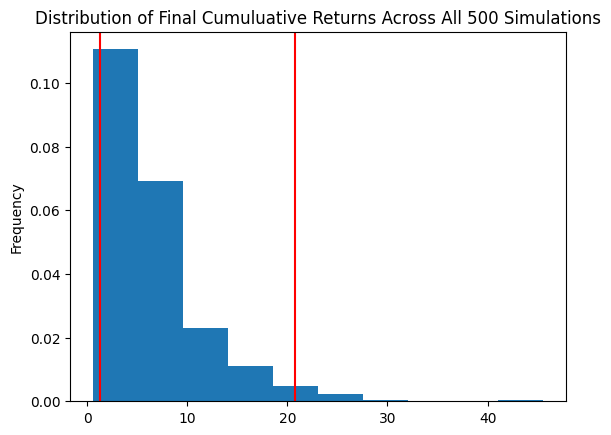

In [24]:
# Plot probability distribution and confidence intervals
dist_plot = mc_thirty_years.plot_distribution()

### Retirement Analysis

In [25]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = mc_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.532004
std               5.053147
min               0.554171
25%               3.225099
50%               5.086870
75%               8.237704
max              45.579185
95% CI Lower      1.306817
95% CI Upper     20.765985
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26136.34 and $415319.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment2 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(tbl[8]*initial_investment2, 2)
ci_upper2 = round(tbl[9]*initial_investment2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $39204.51 and $622979.54


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [28]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
from MCForecastTools import MCSimulation

mc_five_years = MCSimulation(
    portfolio_data=df_mc_tickers,
    weights= [0.05,0.95],
    num_simulation=500,
    num_trading_days = 252*5   
)


In [29]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hirenpatel/fintech/api/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965028,0.990511,0.991803,0.997978,1.009984,1.008103,0.975677,0.992368,1.005128,1.018409,...,1.010979,0.989251,1.016076,0.985943,0.978040,0.985924,1.027609,0.985371,0.986290,1.002052
2,0.961338,0.970726,1.009326,1.001707,1.008334,1.014348,0.971494,1.002329,1.018398,1.036619,...,1.008637,0.985945,1.022289,0.989144,0.990346,0.993449,1.023801,0.978685,0.990806,1.006093
3,0.969354,0.998370,0.983775,1.004640,0.992142,1.002291,0.975900,0.998161,0.993703,1.069093,...,1.002900,0.971535,1.023691,0.978489,0.996008,1.006955,1.037927,0.990521,0.989356,1.010390
4,0.957375,0.991715,1.010051,1.018247,0.987789,0.994518,0.995828,1.009681,0.990193,1.062533,...,1.017305,0.978955,1.008410,0.963576,1.008309,1.005481,1.040266,0.981167,0.990066,1.019888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.225865,2.234744,1.712082,1.562494,2.654207,1.372979,0.903351,2.419493,1.679677,2.352430,...,1.767351,2.094708,1.193663,1.848313,1.258191,1.096966,1.956753,0.883884,0.757155,1.904131
1257,1.233522,2.246314,1.709339,1.538834,2.662039,1.367790,0.903241,2.417387,1.679294,2.411373,...,1.734058,2.082300,1.180762,1.859117,1.258772,1.079543,1.972348,0.881840,0.777162,1.906976
1258,1.235261,2.221624,1.694592,1.571389,2.658970,1.358413,0.907401,2.432214,1.672473,2.410814,...,1.730552,2.102298,1.203594,1.880601,1.249278,1.096191,2.027493,0.886654,0.775957,1.888798
1259,1.249279,2.215900,1.699188,1.569049,2.660328,1.345452,0.906498,2.398486,1.636723,2.416377,...,1.719380,2.119169,1.194160,1.898106,1.277602,1.090804,2.042927,0.877956,0.779150,1.898491


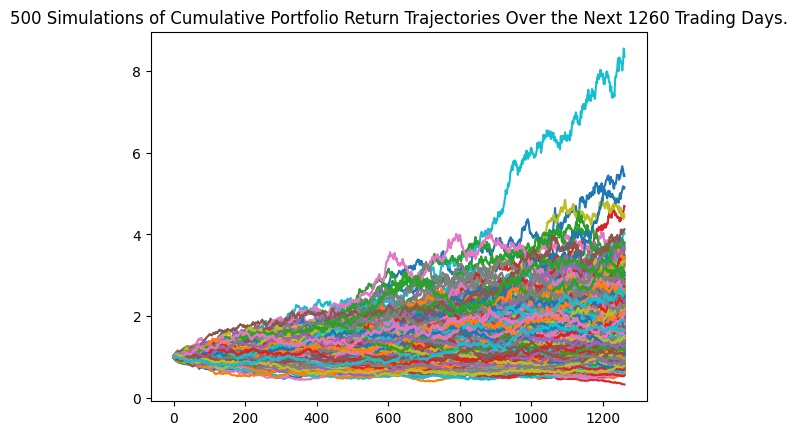

In [30]:
# Plot simulation outcomes
line_plot = mc_five_years.plot_simulation()

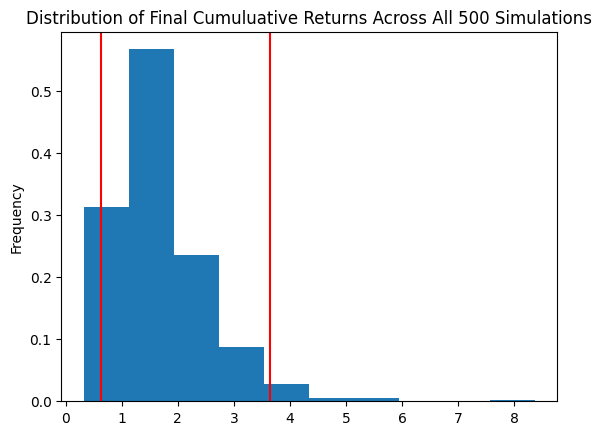

In [31]:
# Plot probability distribution and confidence intervals
dist_plot = mc_five_years.plot_distribution()

In [32]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl5 = mc_five_years.summarize_cumulative_return()

# Print summary statistics
print(tbl5)

count           500.000000
mean              1.689863
std               0.837224
min               0.322854
25%               1.125042
50%               1.474378
75%               2.095408
max               8.364394
95% CI Lower      0.633407
95% CI Upper      3.650759
Name: 1260, dtype: float64


In [33]:
# Set initial investment
initial_investment_5 = 85000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $85,000
ci_lower_five = round(tbl5[8]*initial_investment_5, 2)
ci_upper_five = round(tbl5[9]*initial_investment_5, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $85000 in the portfolio over the next 5 years will end within in the range of $53839.61 and $310314.56


### Ten Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
from MCForecastTools import MCSimulation

mc_ten_years = MCSimulation(
    portfolio_data=df_mc_tickers,
    weights= [0.10,0.90],
    num_simulation=500,
    num_trading_days = 252*10   
)


In [35]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/hirenpatel/fintech/api/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001623,1.009571,0.997516,1.023413,1.008609,0.988030,1.014182,1.012982,1.001234,1.002142,...,1.004675,0.997469,0.987106,1.007273,0.976186,1.020941,1.002981,1.003352,1.011852,1.019320
2,1.010183,1.000644,0.997416,1.022532,1.001022,1.009810,1.021808,1.015582,1.016528,1.014204,...,1.011335,0.987015,1.004846,1.006486,0.974723,1.009865,0.992023,0.985260,0.968923,1.028400
3,1.012139,1.002926,1.005602,1.007444,0.984926,1.040652,1.044098,1.002810,1.035876,0.985292,...,1.004681,0.997189,1.015351,0.994203,0.980253,1.043574,0.972855,1.002097,0.970734,1.029197
4,1.015956,1.011327,1.001875,0.993435,0.990510,1.021610,1.064421,1.004276,1.052675,0.989805,...,0.994722,0.983618,1.034831,1.027686,0.994504,1.048549,0.973526,1.003404,0.960545,1.030774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.429777,1.477275,3.431281,2.489464,1.778413,1.508877,1.785613,1.770972,2.897752,7.525988,...,1.913199,7.189127,5.419555,1.027760,2.198533,4.386739,2.621969,0.730465,4.108350,1.119840
2517,2.452380,1.471278,3.502251,2.467424,1.739409,1.530654,1.803046,1.773514,2.876934,7.598890,...,1.933007,7.126684,5.420871,1.010628,2.219608,4.440084,2.693797,0.726776,4.128354,1.125100
2518,2.431677,1.462526,3.572340,2.477775,1.731461,1.521199,1.806739,1.769146,2.854306,7.626317,...,1.935871,7.225611,5.454838,1.034972,2.183074,4.390069,2.721897,0.731652,4.028191,1.113918
2519,2.398895,1.467142,3.529870,2.450892,1.736783,1.507527,1.803800,1.765297,2.869844,7.594749,...,1.947933,7.276794,5.414372,1.049106,2.198165,4.360576,2.720211,0.738110,3.992924,1.112735


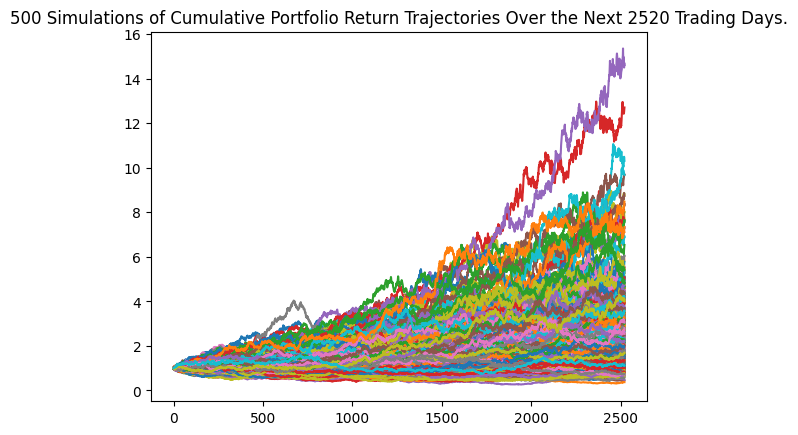

In [36]:
# Plot simulation outcomes
line_plot = mc_ten_years.plot_simulation()

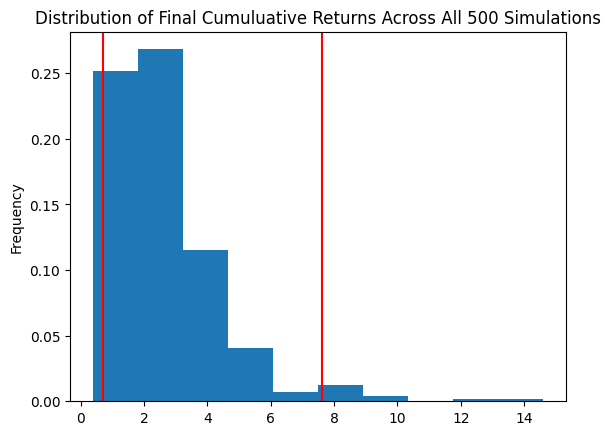

In [37]:
# Plot probability distribution and confidence intervals
dist_plot = mc_ten_years.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = mc_ten_years.summarize_cumulative_return()

# Print summary statistics
print(tbl10)

count           500.000000
mean              2.634457
std               1.735942
min               0.372553
25%               1.512591
50%               2.226110
75%               3.256173
max              14.611735
95% CI Lower      0.702692
95% CI Upper      7.623436
Name: 2520, dtype: float64


In [39]:
# Set initial investment
initial_investment_10 = 75000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $75,000
ci_lower_ten = round(tbl10[8]*initial_investment_10, 2)
ci_upper_ten = round(tbl10[9]*initial_investment_10, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $75000 in the portfolio over the next 10 years will end within in the range of $52701.89 and $571757.72


In [45]:

# Print results
print("------------------------------------------------------------------------------------------------------------")
print(f"With an initial investment of ${initial_investment} compounded over 30 years with a 40/60 Bond/Stock mix...")
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")
print("------------------------------------------------------------------------------------------------------------")
print(f"With an initial investment of ${initial_investment2} compounded over 30 years with a 40/60 Bond/Stock mix...")
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")
print("------------------------------------------------------------------------------------------------------------")
print(f"With an initial investment of ${initial_investment_5} compounded over 5 years with a 5/95 Bond/Stock mix...")
print(f"There is a 95% chance that an initial investment of ${initial_investment_5} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")
print("------------------------------------------------------------------------------------------------------------")
print(f"With an initial investment of ${initial_investment_10} compounded over 10 years with a 10/90 Bond/Stock mix...")
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")
print("------------------------------------------------------------------------------------------------------------")
print(f"In Summary, the client will have to increase portfolio risk and increase the initial investment substantially "
      f"if they want to retire in 5-10 years.  The 10-year plan gets them closer to their financial goals vs. the " 
      f"5-year plan when compared to the 30-year plan options.  The 5 and 10-year plans require the initial investment "
      f"to jump from the $20,000 or 30,000 range to the $75,000 to $85,000 range in order to try and come close "
      f"to the portfolio value expected in the 30-year plan.  The  stock mix also needs to jump from 60% to 90-95% "
      f"to hit portfolio size goals faster. I would recommend the 10-year plan vs. the 5-year plan "
      f"as it gets closer to 30-year portfolio size targets.")

------------------------------------------------------------------------------------------------------------
With an initial investment of $20000 compounded over 30 years with a 40/60 Bond/Stock mix...
There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $26136.34 and $415319.69
------------------------------------------------------------------------------------------------------------
With an initial investment of $30000.0 compounded over 30 years with a 40/60 Bond/Stock mix...
There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $39204.51 and $622979.54
------------------------------------------------------------------------------------------------------------
With an initial investment of $85000 compounded over 5 years with a 5/95 Bond/Stock mix...
There is a 95% chance that an initial investment of $85000 in the portfolio over